In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style("whitegrid")

font = {'family': 'sans-serif', 'serif' : 'Helvetica',
        'size'   : 25}
plt.rc('font', **font)

my_quali_colormaps = ['colorblind', 'Dark2']

In [3]:
storage = os.environ['MICOM_EXP'] + 'setA_coculture_b12_c72/' # on Peregrine
print(storage)

run_status_file = storage + "run_status.tsv"
run_status = pd.read_csv(run_status_file, sep="\t", usecols=['rep_name','simID', 'culture_type', 'program_log_doneSim'])

rep_simID_dict = run_status.loc[run_status['program_log_doneSim']==1.0, :].groupby(['rep_name', 'culture_type'])['simID'].apply(list).to_dict()
rep_simID_dict

/data/s4278836/First_project/experiments/setA_coculture_b12_c72/


{('rep1', 'batch'): ['I_a_I_b_plastic',
  'I_a_I_b_sfm',
  'I_a_II_a_plastic',
  'I_a_II_a_sfm',
  'I_a_II_b_plastic',
  'I_a_II_b_sfm',
  'I_a_V_plastic',
  'I_a_V_sfm',
  'I_b_II_a_plastic',
  'I_b_II_a_sfm',
  'I_b_II_b_plastic',
  'I_b_II_b_sfm',
  'I_b_V_plastic',
  'I_b_V_sfm',
  'II_a_II_b_plastic',
  'II_a_II_b_sfm',
  'II_a_V_plastic',
  'II_a_V_sfm',
  'II_b_V_plastic',
  'II_b_V_sfm'],
 ('rep1', 'continuous'): ['I_a_I_b_plastic',
  'I_a_I_b_sfm',
  'I_a_II_a_plastic',
  'I_a_II_a_sfm',
  'I_a_II_b_plastic',
  'I_a_II_b_sfm',
  'I_a_V_plastic',
  'I_a_V_sfm',
  'I_b_II_a_plastic',
  'I_b_II_a_sfm',
  'I_b_II_b_plastic',
  'I_b_II_b_sfm',
  'I_b_V_plastic',
  'I_b_V_sfm',
  'II_a_II_b_plastic',
  'II_a_II_b_sfm',
  'II_a_V_plastic',
  'II_a_V_sfm',
  'II_b_V_plastic',
  'II_b_V_sfm'],
 ('rep2', 'batch'): ['I_a_I_b_plastic',
  'I_a_I_b_sfm',
  'I_a_II_a_plastic',
  'I_a_II_a_sfm',
  'I_a_II_b_plastic',
  'I_a_II_b_sfm',
  'I_a_V_plastic',
  'I_a_V_sfm',
  'I_b_II_a_plastic',
  

In [4]:
rep_simID_check_dict = {x[0]+'_'+x[1]: {rep_simID_dict[x][i]: 1 for i in range(len(rep_simID_dict[x]))} for x in rep_simID_dict.keys()}
rep_simID_df = pd.DataFrame.from_dict(rep_simID_check_dict, dtype='int')

print(rep_simID_df.head())
print('\n')
print(rep_simID_df.sum())

                  rep1_batch  rep1_continuous  rep2_batch  rep2_continuous  \
I_a_I_b_plastic            1                1           1                1   
I_a_I_b_sfm                1                1           1                1   
I_a_II_a_plastic           1                1           1                1   
I_a_II_a_sfm               1                1           1                1   
I_a_II_b_plastic           1                1           1                1   

                  rep3_batch  rep3_continuous  rep4_batch  rep4_continuous  \
I_a_I_b_plastic            1                1           1                1   
I_a_I_b_sfm                1                1           1                1   
I_a_II_a_plastic           1                1           1                1   
I_a_II_a_sfm               1                1           1                1   
I_a_II_b_plastic           1                1           1                1   

                  rep5_batch  rep5_continuous  
I_a_I_b_plasti

For each replicate & culture condition, if sum returns 20, it means all 20 simulations (10 two-member communities in plastic or non-plastic mode) have sucessfully completed.

In [5]:
rep_name_list = rep_simID_df.columns.values
print(rep_name_list)

community_set = set([x.rsplit('_', 1)[0] for x in rep_simID_df.index.values])
print(community_set)

culture_type_list = ['batch', 'continuous']

media = ['EU_avg', 'high_fat']

['rep1_batch' 'rep1_continuous' 'rep2_batch' 'rep2_continuous'
 'rep3_batch' 'rep3_continuous' 'rep4_batch' 'rep4_continuous'
 'rep5_batch' 'rep5_continuous']
{'II_b_V', 'II_a_V', 'I_a_II_b', 'I_a_V', 'I_b_II_a', 'I_b_II_b', 'I_b_V', 'I_a_II_a', 'I_a_I_b', 'II_a_II_b'}


In [6]:
replicates = ['rep1_batch']

simID = 'I_a_II_b_plastic'

check_culture_type = set(r.rsplit('_')[1] for r in replicates)

if len(check_culture_type) > 1:
    raise ValueError('Function only works for one type of culture, either batch or continuous')
    
meta_file = storage + 'selected_species_setA.tsv'
meta = pd.read_csv(meta_file, sep="\t")

merged_data = pd.DataFrame()

for r in replicates:
    rep = r.rsplit('_')[0]

    for m in media:
        data_dir = storage + rep + '/v2.10.0_sim_' + simID + '/experiments/' + list(check_culture_type)[0] + '_coculture/'  + m + '/'
        data_file = data_dir + 'species_trajectory.tsv'

        df = pd.read_csv(data_file, sep="\t", usecols=['species_name', 'time', 'od'])
        df['media'] = m
        df['replicate'] = rep
    
        merged_data = pd.concat([merged_data, df])
    
members = meta.loc[meta['Species_name'].isin(df['species_name'].unique()), :]
print(members)

merged_data.reset_index(drop=True)

merged_data

  Ecotype Ecotype_ID Species_ID                      Species_name
0       I        I_a    setA_15         Helicobacter_pylori_26695
3      II       II_b    setA_24  Ruminococcus_lactaris_ATCC_29176


species_name     time         od     media replicate
0            Helicobacter_pylori_26695   0.0000   0.001000    EU_avg      rep1
1     Ruminococcus_lactaris_ATCC_29176   0.0000   0.001000    EU_avg      rep1
2            Helicobacter_pylori_26695   0.0480   0.001095    EU_avg      rep1
3     Ruminococcus_lactaris_ATCC_29176   0.0480   0.001156    EU_avg      rep1
4            Helicobacter_pylori_26695   0.0720   0.001145    EU_avg      rep1
...                                ...      ...        ...       ...       ...
1045  Ruminococcus_lactaris_ATCC_29176  11.9710  51.962800  high_fat      rep1
1046         Helicobacter_pylori_26695  11.9951  16.015700  high_fat      rep1
1047  Ruminococcus_lactaris_ATCC_29176  11.9951  51.962800  high_fat      rep1
1048         Helicobacter_pylori_26695  12.0000  16.015700  high_fat      rep1
1049  Ruminococcus_lactaris_ATCC_29176  12.0000  51.962800  high_fat      rep1

[2062 rows x 5 columns]

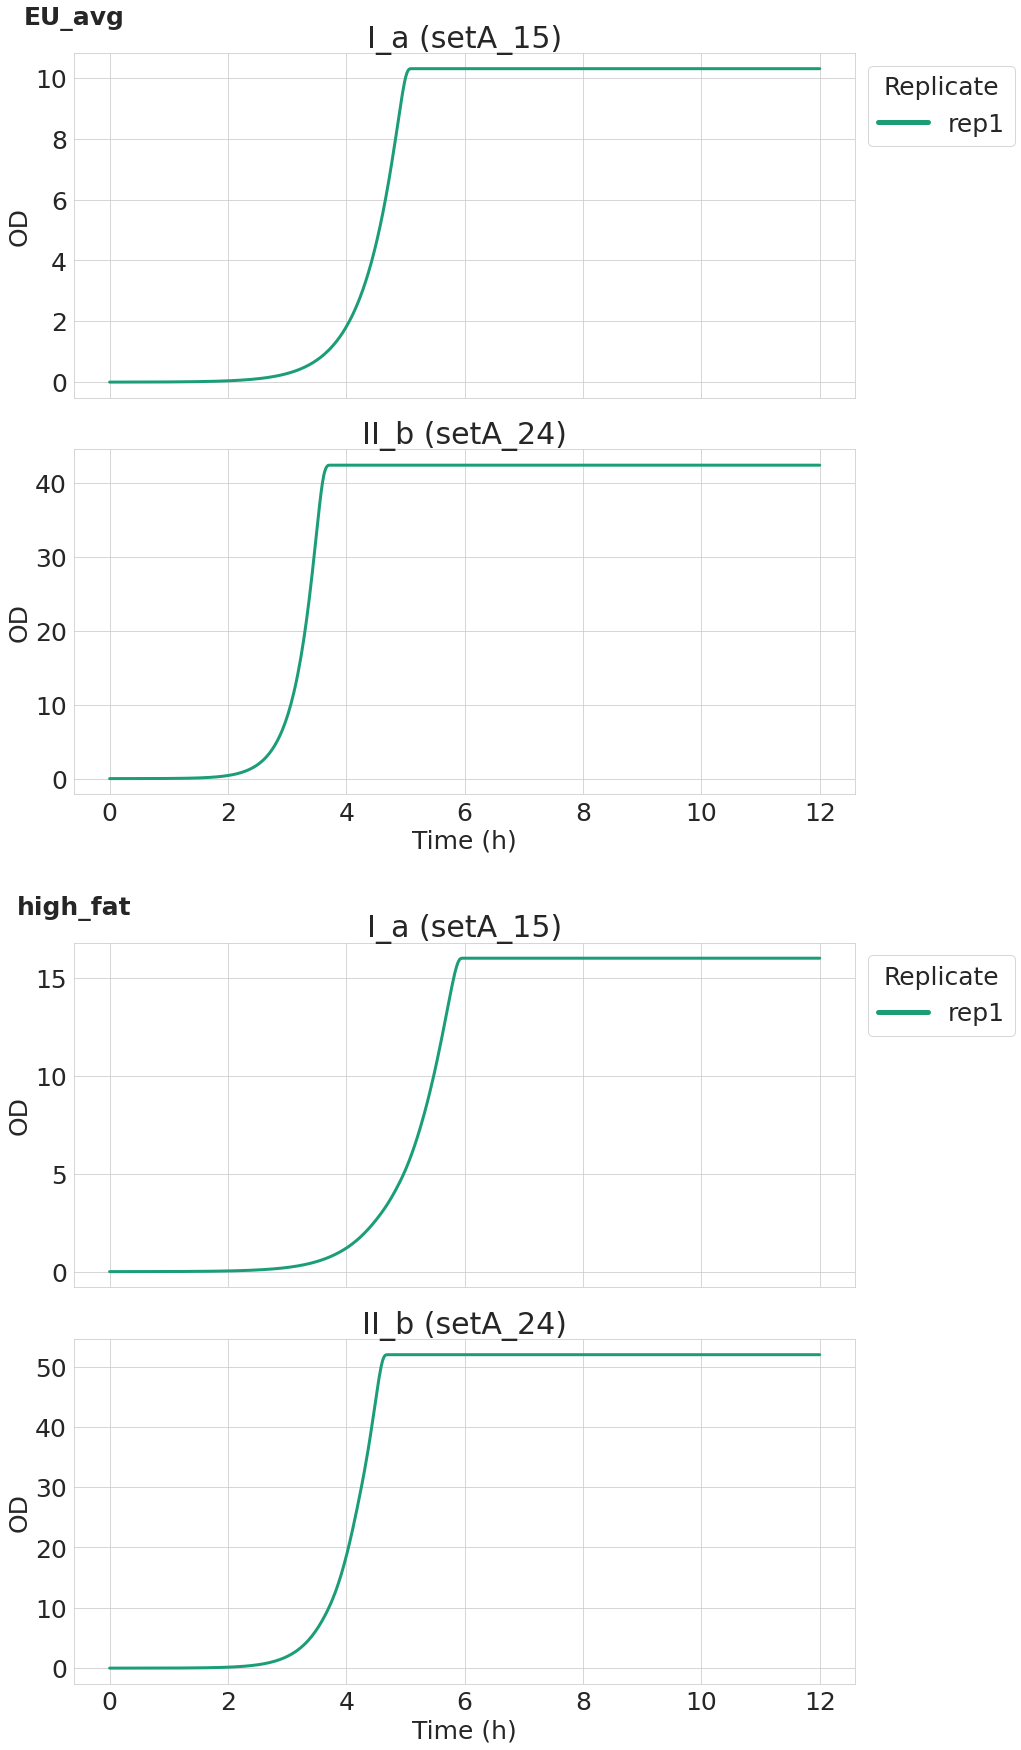

In [7]:
fig = plt.figure(figsize=(14, 15*len(media)))
                 
outer = gridspec.GridSpec(nrows=len(media), ncols=1, wspace=0.2, hspace=0.2)
                 
for i in range(len(media)):
    inner = gridspec.GridSpecFromSubplotSpec(nrows=members.shape[0], ncols=1,
                                             subplot_spec=outer[i], wspace=0.15, hspace=0.15)

    for j in range(members.shape[0]):

        plot_data = merged_data.loc[(merged_data['species_name'] == members.iloc[j, 3]) & (merged_data['media'] == media[i]), 
                                    ['time', 'od', 'replicate']]

        plot_ax = plt.Subplot(fig, inner[j])
        
        kwargs={'linewidth':3}
        g = sns.lineplot(data = plot_data, x='time', y='od', hue='replicate', ax=plot_ax, 
                         palette = sns.color_palette(my_quali_colormaps[1], len(replicates)), 
                         **kwargs)
        title = members.iloc[j, 1] + " (" + members.iloc[j, 2] + ")" 
        plot_ax.set(title=title, ylabel='OD')
        
        if j == members.shape[0]-1:
            plot_ax.set(xlabel='Time (h)')
        else:
            plot_ax.set(xlabel='', xticklabels=[])
            
        if j == 0:
            
            plot_ax.text(0.0, 1.1, s=media[i], ha='center', va='center', transform=plot_ax.transAxes, 
                         fontweight='bold')
            lgnd = plot_ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), title='Replicate')
            # Change width of lines in legend
            for line in lgnd.get_lines():
                line.set_linewidth(5)
            
        else:
            plot_ax.get_legend().remove()
        
        fig.add_subplot(plot_ax)